In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import pathlib
import os
from os import listdir
import glob
from PIL import Image

cinic_directory_train = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\train'
cinic_directory_test = 'D:\\GitHub\\cinic-10_image_classification_challenge-dataset\\test'

class_name = []
file_name='output_fromKeras.csv'
optimiser='adamax' # les best : Adam, nadam et adamax
nb_epochs=50
batch_size_choice=16
image_size=(32, 32)
loss_func='sparse_categorical_crossentropy'

In [14]:
# loading in the data 
train_ds = keras.preprocessing.image_dataset_from_directory(
    cinic_directory_train,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size_choice
)

Found 90000 files belonging to 10 classes.
Using 72000 files for training.


In [15]:
# loading in the data 
validation_ds = keras.preprocessing.image_dataset_from_directory(
    cinic_directory_train,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size_choice
)

Found 90000 files belonging to 10 classes.
Using 18000 files for validation.


In [16]:
class_names= train_ds.class_names
num_classes = len(class_names)
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Liczba obrazów w klasie airplane: 7234
Liczba obrazów w klasie automobile: 7198
Liczba obrazów w klasie bird: 7221
Liczba obrazów w klasie cat: 7198
Liczba obrazów w klasie deer: 7243
Liczba obrazów w klasie dog: 7212
Liczba obrazów w klasie frog: 7227
Liczba obrazów w klasie horse: 7165
Liczba obrazów w klasie ship: 7144
Liczba obrazów w klasie truck: 7158


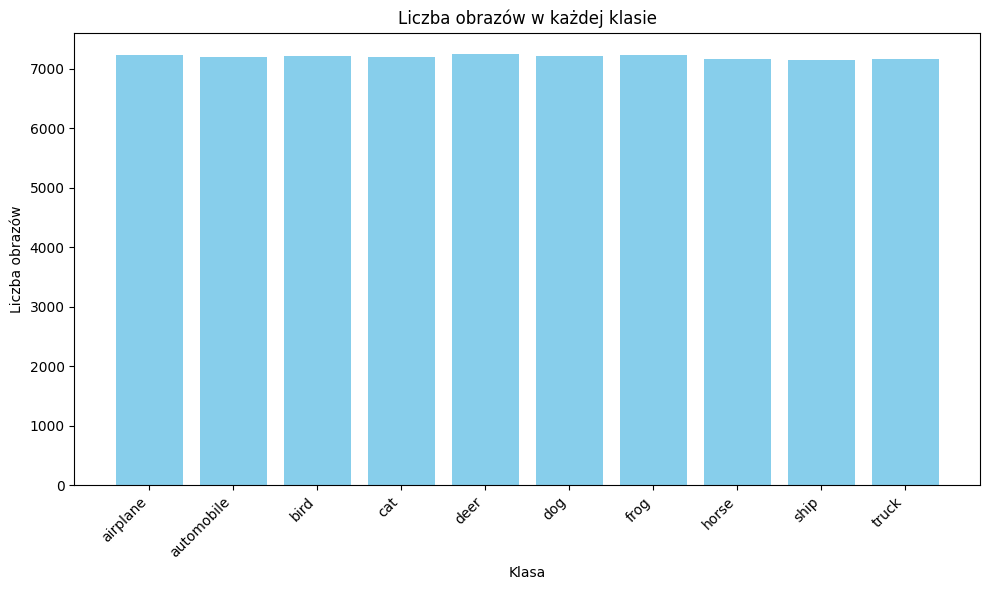

In [32]:
# Inicjalizacja słownika do zliczania liczby obrazów w każdej klasie
class_count = {class_name: 0 for class_name in class_names}

# Przechodzenie przez zbiór danych i zliczanie obrazów w każdej klasie
for images, labels in train_ds:
    for label in labels.numpy():
        class_count[class_names[label]] += 1

# Wyświetlenie liczby obrazów w każdej klasie
for class_name, count in class_count.items():
    print(f"Liczba obrazów w klasie {class_name}: {count}")

# Dane do wykresu słupkowego
class_names = list(class_count.keys())
counts = list(class_count.values())

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel('Klasa')
plt.ylabel('Liczba obrazów')
plt.title('Liczba obrazów w każdej klasie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [26]:
model.compile(
    optimizer=optimiser,  
    loss=loss_func,
    metrics=['accuracy']
)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 75)        2100      
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 75)       300       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 75)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 50)        33800     
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 50)        0         
                                                                 
 batch_normalization_13 (Bat  (None, 16, 16, 50)      

In [28]:
model.fit(
    train_ds,
    validation_data=validation_ds, 
    epochs=20, 
    verbose=1
)

Epoch 1/20


4500/4500 [==============================] - 32s 7ms/step - loss: 1.5864 - accuracy: 0.4225 - val_loss: 1.5866 - val_accuracy: 0.4236
Epoch 2/20
4500/4500 [==============================] - 34s 7ms/step - loss: 1.2920 - accuracy: 0.5306 - val_loss: 1.3823 - val_accuracy: 0.5090
Epoch 3/20
4500/4500 [==============================] - 30s 7ms/step - loss: 1.1755 - accuracy: 0.5773 - val_loss: 1.3593 - val_accuracy: 0.5310
Epoch 4/20
4500/4500 [==============================] - 31s 7ms/step - loss: 1.1040 - accuracy: 0.6019 - val_loss: 1.8600 - val_accuracy: 0.4321
Epoch 5/20
4500/4500 [==============================] - 29s 6ms/step - loss: 1.0471 - accuracy: 0.6244 - val_loss: 1.1766 - val_accuracy: 0.5808
Epoch 6/20
4500/4500 [==============================] - 32s 7ms/step - loss: 0.9973 - accuracy: 0.6399 - val_loss: 1.1637 - val_accuracy: 0.5963
Epoch 7/20
4500/4500 [==============================] - 32s 7ms/step - loss: 0.9515 - accuracy: 0.6569 - val_loss: 1.0673 - val_accuracy: 0.6